# How to register a temporal sequence of intensity images

## Introduction

### Aim & explanations

This *how-to* aims at explaining how to performs **image registration** for a temporal sequence of intensity images, also called time-series, using the dedicated plugin from `timagetk`'s `plugins` module.

There are several reasons for which you would like and should performs a *time-series temporal registration* prior to a quantitative analysis but most importantly, it will give you a *growth centered view* of the time series and a temporally coherent view of the observed process.

Implications are:

 - sequence animations will be centered on the object;
 - subsequent deformation analysis, such as *cell displacement* or *cell growth* quantifications, will also benefit from it.

It should be noted that if its biologicaly relevant and you have the means of doing it, using a *fixed reference point* should be doable with `create_trsf` using the `fixed_point` keyword parameter...

### Import the required classes & functions

In [1]:
%matplotlib inline
from timagetk.components.multi_channel import BlendImage
from timagetk.components.multi_channel import MultiChannelImage
from timagetk.tasks.registration import sequence_registration
from timagetk.io import imread
from timagetk.io.image import _image_from_url
from timagetk.visu.mplt import grayscale_imshow

/home/aurele/Soft/timagetk/src/timagetk/components/labelled_image.py:32: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Note that the first line `%matplotlib inline` is only required here in the jupyter notebook to display matplotlib figures.

### Load time-series of grayscale images

In [2]:
file_urls = [
    "https://zenodo.org/record/7151866/files/p58-t0-imgFus.inr.gz",
    "https://zenodo.org/record/7151866/files/p58-t1-imgFus.inr.gz",
    "https://zenodo.org/record/7151866/files/p58-t2-imgFus.inr.gz"
]
file_hashs = [
    "48f6f9924289037c55ea785273c2fe72",
    "377dfa1b2aaf2471e5f8ab5655ef7610",
    "0c08a63c0966bd5655e4676893dd1068"
]

In [3]:
fnames = [_image_from_url(url ,hash_value=md5_hash, hash_method='md5') for url, md5_hash in zip(file_urls, file_hashs)]

In [4]:
images = [imread(fname) for fname in fnames]

## Down-sample the images to speed-up the computations

In [12]:
from timagetk.algorithms.resample import resample

In [13]:
print("# - Voxelsize (ZYX) for the initial image list:")
print("\n".join([f"Image '{im.filename}' (#{n}): {im.voxelsize}" for n, im in enumerate(images)]))
print("# - Shape (ZYX) for the initial image list:")
print("\n".join([f"Image '{im.filename}' (#{n}): {im.shape}" for n, im in enumerate(images)]))

# - Voxelsize (ZYX) for the initial image list:
Image 'p58-t0-imgFus.inr.gz' (#0): [0.20032000541687012, 0.20032000541687012, 0.20032000541687012]
Image 'p58-t1-imgFus.inr.gz' (#1): [0.2002449929714203, 0.2002449929714203, 0.2002449929714203]
Image 'p58-t2-imgFus.inr.gz' (#2): [0.1990640014410019, 0.1990640014410019, 0.1990640014410019]
# - Shape (ZYX) for the initial image list:
Image 'p58-t0-imgFus.inr.gz' (#0): (320, 460, 460)
Image 'p58-t1-imgFus.inr.gz' (#1): (360, 576, 576)
Image 'p58-t2-imgFus.inr.gz' (#2): (352, 772, 772)


In [14]:
images = [resample(im, voxelsize=[1., 0.5, 0.5]) for im in images]

2022-10-06 11:47:28,621 - timagetk.algorithms.resample - 159 - INFO - Resampling using provided voxel-sizes: [1.0, 0.5, 0.5]
2022-10-06 11:47:28,900 - timagetk.algorithms.resample - 159 - INFO - Resampling using provided voxel-sizes: [1.0, 0.5, 0.5]
2022-10-06 11:47:29,152 - timagetk.algorithms.resample - 159 - INFO - Resampling using provided voxel-sizes: [1.0, 0.5, 0.5]


In [15]:
print("# - Voxelsize (ZYX) for the resampled image list:")
print("\n".join([f"Image '{im.filename}' (#{n}): {im.voxelsize}" for n, im in enumerate(images)]))
print("# - Shape (ZYX) for the resampled image list:")
print("\n".join([f"Image '{im.filename}' (#{n}): {im.shape}" for n, im in enumerate(images)]))

# - Voxelsize (ZYX) for the resampled image list:
Image 'p58-t0-imgFus.inr.gz' (#0): [1.0, 0.5, 0.5]
Image 'p58-t1-imgFus.inr.gz' (#1): [1.0, 0.5, 0.5]
Image 'p58-t2-imgFus.inr.gz' (#2): [1.0, 0.5, 0.5]
# - Shape (ZYX) for the resampled image list:
Image 'p58-t0-imgFus.inr.gz' (#0): (64, 184, 184)
Image 'p58-t1-imgFus.inr.gz' (#1): (72, 231, 231)
Image 'p58-t2-imgFus.inr.gz' (#2): (70, 307, 307)


### Visualize the time-series

2022-10-06 11:47:31,777 - guess_intensity_threshold - 543 - INFO - Automatically estimated intensity threshold value: 35.1
2022-10-06 11:47:33,330 - guess_intensity_threshold - 543 - INFO - Automatically estimated intensity threshold value: 46.800000000000004
2022-10-06 11:47:35,158 - guess_intensity_threshold - 543 - INFO - Automatically estimated intensity threshold value: 53.300000000000004


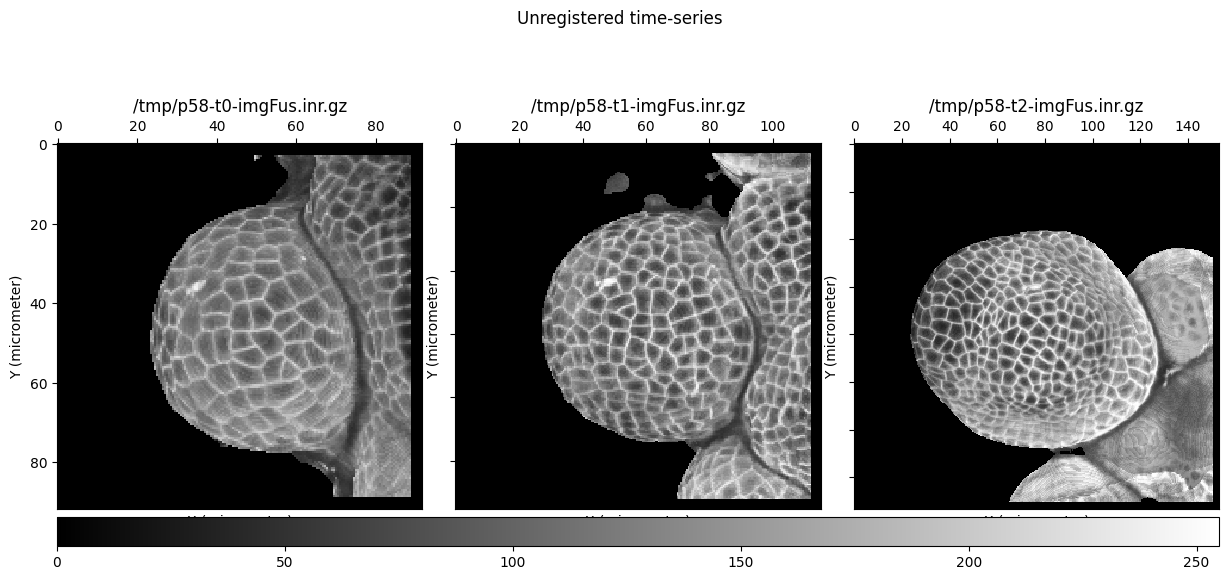

In [16]:
_=grayscale_imshow(images, suptitle="Unregistered time-series", title=fnames, val_range=[0, 255])

## Performs sequence rigid registration

In [17]:
trsfs, res_imgs = sequence_registration(images, method='rigid')

2022-10-06 11:47:37,435 - root - 210 - INFO - Performing consecutive image registration...
2022-10-06 11:47:37,436 - timagetk.algorithms.blockmatching - 290 - INFO - RIGID registration
 - processing level # 3          
    - Iteration #  1     Level # 3     Size   32x  32x  32
    - Iteration #  2     Level # 3     Size   32x  32x  32
    - Iteration #  3     Level # 3     Size   32x  32x  32
    - Iteration #  4     Level # 3     Size   32x  32x  32
    - Iteration #  5     Level # 3     Size   32x  32x  32
    - Iteration #  6     Level # 3     Size   32x  32x  32
    - Iteration #  7     Level # 3     Size   32x  32x  32
    - Iteration #  8     Level # 3     Size   32x  32x  32
    - Iteration #  9     Level # 3     Size   32x  32x  32
    - Iteration # 10     Level # 3     Size   32x  32x  32

 - processing level # 2          
    - Iteration #  1     Level # 2     Size   64x  64x  64
    - Iteration #  2     Level # 2     Size   64x  64x  64
    - Iteration #  3     Level # 2    

In [18]:
from timagetk.visu.mplt import grayscale_imshow
_=grayscale_imshow(list(res_imgs.values()), suptitle="Sequence RIGID registration", title=fnames, val_range=[0, 255])

2022-10-06 11:47:41,682 - root - 540 - WARNING - Could not detect intensity threshold with 'bimodal search'...
2022-10-06 11:47:41,682 - root - 541 - INFO - Using value obtained from 'percentile search'...
2022-10-06 11:47:41,683 - guess_intensity_threshold - 543 - INFO - Automatically estimated intensity threshold value: 7.0
2022-10-06 11:47:43,961 - root - 540 - WARNING - Could not detect intensity threshold with 'bimodal search'...
2022-10-06 11:47:43,961 - root - 541 - INFO - Using value obtained from 'percentile search'...
2022-10-06 11:47:43,961 - guess_intensity_threshold - 543 - INFO - Automatically estimated intensity threshold value: 11.0
2022-10-06 11:47:46,125 - guess_intensity_threshold - 543 - INFO - Automatically estimated intensity threshold value: 53.300000000000004
